# Podstawy Numpy'a i Matplotliba

... ale na początek trochę o samym Jupyterze. Jeżeli znasz już to środowisko, przejdź do sekcji z zadaniami.

## Jupyter Notebook

Interaktywne środowisko do uruchamiania kodu, używane najczęściej w analizie danych. Wszystko zorganizowane jest w **komórki (cells)**, które mogą być albo kodem (typowo Python) albo tekstem w formacie Markdown. Ta komórka, którą teraz czytasz, to komórka Markdown.

Komórki odpala się przyciskiem Run. Powoduje to uruchomienie kodu z tej komórki i **tylko** z tej komórki. Gwarantuje to izolację kodu. Stan wszystkich komórek odpalonych poprzednio w danej sesji jest **zapisywany**. Pozwala to zapisać ciężkie obliczenia (np. trening sieci neuronowej trwający 12 godzin) w jednej komórce, a potem operować na wynikach takiej operacji w innych komórkach bez powtarzania obliczeń.

Jeżeli wolisz, to notebooki Jupytera można też otwierać i edytować w PyCharmie. Sam Jupyter sprawdza się jednak dość dobrze, podpowiedzi do argumentów są bardzo podobne do PyCharma: Shift + Tab dla krótkiej podpowiedzi, klikając jeszcze raz Tab (trzymając Shift) dostaniemy rozwiniętą odpowiedź z całą dokumentacją funkcji.

Parę poniższych komórek zawiera proste ćwiczenia pozwalające przećwiczyć sobie działanie Jupytera.

In [5]:
# imports are typically in separate cells

import math

In [6]:
# function definitions are typically in separate cells
# you can have many definitions in 1 cell, but do not mix function definitions and executing code

def safe_divide(a, b):
    """
    Computes a/b; if b is 0, returns infinity
    """
    try:
        return a / b
    except ZeroDivisionError:
        return math.inf

In [ ]:
# code for execution which uses previously defined function
# you **have to** execute the previous cell for the function to be available

c = safe_divide(5, 3)
d = safe_divide(5, 0)
print(c, d)

1.6666666666666667 inf


Ciekawą cechą Jupyter Notebooków jest to, że wypisują automatycznie zmienną, jeżeli napiszemy ją na końcu, bez opakowania jej w `print()`. Jest to wygodne, bo w analizie danych często chcemy przyjrzeć się wynikowi, żeby zweryfikować poprawność.

In [ ]:
c, d

(1.6666666666666667, inf)

## Numpy i Matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [56]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])
sc = arr[1,:2]
sc[0] = 10


print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Zadanie 1

Stwórz macierz z elementami z rozkładu normalnego rozmiaru 100x100.

Macierze losowe z rozkładem normalnym są dobre do prostych testów wydajnościowych.

In [4]:
mat = np.random.uniform(size=(100,100))
print(mat)

[[0.04035467 0.35112803 0.48242146 ... 0.46235319 0.83496175 0.77829251]
 [0.54521986 0.36013392 0.86382095 ... 0.81643682 0.73954953 0.20883208]
 [0.95314815 0.80720916 0.73146656 ... 0.77039273 0.17002981 0.25125174]
 ...
 [0.04949005 0.98868548 0.59746349 ... 0.35123687 0.72281387 0.89399395]
 [0.57841411 0.20394555 0.49211773 ... 0.70977126 0.38170087 0.36599791]
 [0.25847332 0.3396454  0.18660439 ... 0.45444823 0.03046454 0.76213428]]


### Zadanie 2

Stwórz macierz 4x4 wypełnioną kolejnymi liczbami 1, 2, ..., 16. Przekaż je jako listę 2D.

Takie małe ręcznie tworzone macierze przydają się w debugowaniu i testowaniu różnych funkcji.

In [11]:
mat = np.arange(1,17)
mat = mat.reshape(4,4)
print(mat)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


### Zadanie 3

Uzupełnij kod funkcji `get_array_summary()`, która zwraca string z następującymi informacjami dla przekazanej macierzy `a`:
- liczba wymiarów
- kształt
- typ danych
- sumaryczna ilość zajmowanej pamięci w KB
- największa i najmniejsza wartość

Takie informacje są bardzo przydatne podczas debugowania i optymalizacji obliczeń.

In [26]:
def get_array_summary(A):
    summary = "ARRAY SUMMARY\n"
    
    # fill necessary information
    summary += "ndims: %d\n" % A.ndim
    summary += "shape: %s\n" % str(A.shape)
    summary += "dtype: %s\n" % A.dtype
    summary += "total size (KB): %d \n" % A.nbytes
    summary += "min value: %d \n" % np.min(A)
    summary += "max value: %d \n" % np.max(A)
    
    return summary

print(get_array_summary(mat))

ARRAY SUMMARY
ndims: 2
shape: (4, 4)
dtype: int64
total size (KB): 128 
min value: 1 
max value: 16 



### Zadanie 4

Rozkład log-normalny ([Wikipedia](https://en.wikipedia.org/wiki/Log-normal_distribution)) to taki rozkład $X$, że rozkład $Y = \ln{(X)}$ ma rozkład normalny. Innymi słowy jeżeli rozkład $Y$ ma rozkład normalny, to $X = \exp{(Y)}$ ma rozkład log-normalny.

Rozkład log-normalny przypomina "wygięty" w stronę początkowych wartości rozkład normalny, więc próbkując (losując) z takiego rozkładu otrzymamy więcej otrzymamy więcej małych wartości. Jest to często bardzo pożądane w optymalizacji modeli uczenia maszynowego, gdzie niewielkie wartości parametrów sterujących zachowaniem algorytmu (tzw. hiperparametry) wymuszają znaczne uproszczenie modelu, co skraca czas wykonania i ulepsza wyniki podczas praktycznego działania.

Wygeneruj wektory 1D rozkładu normalnego i log-normalnego ([dokumentacja](https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html)) po 1000 punktów, a następnie narysuj je na dwóch osobnych histogramach. Zaletą Jupyter Notebooka jest to, że nie musisz nic czyścić - kolejne wykresy pokażą się jeden pod drugim.

Przyda ci się tutaj funkcja do rysowania histogramu `plt.hist()` ([dokumentacja](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)). Podziel każdy z rozkładów na 50 binów, żeby uzyskać dość precyzyjne kształtem wykresy.

In [41]:
# generate vectors with appropriate distributions
normal = np.random.normal(size = 10000)
log_norm = np.random.lognormal(size = 10000)


(array([0.00588544, 0.01103521, 0.0188124 , 0.02543353, 0.03300053,
        0.04256437, 0.05359958, 0.0643195 , 0.07756174, 0.09290594,
        0.11035208, 0.12937467, 0.14818707, 0.17225434, 0.19653179,
        0.22122964, 0.24823962, 0.27630058, 0.30394115, 0.33462953,
        0.36720967, 0.39968471, 0.43415659, 0.46768261, 0.50110352,
        0.53662638, 0.57235943, 0.60094587, 0.62848135, 0.6602207 ,
        0.69259065, 0.72012612, 0.74787178, 0.77656332, 0.80231214,
        0.82469785, 0.84676826, 0.87115081, 0.88954283, 0.90614819,
        0.91991592, 0.93536521, 0.94787178, 0.95890699, 0.96910142,
        0.97540725, 0.98276406, 0.98843931, 0.99453494, 1.        ]),
 array([-2.  , -1.92, -1.84, -1.76, -1.68, -1.6 , -1.52, -1.44, -1.36,
        -1.28, -1.2 , -1.12, -1.04, -0.96, -0.88, -0.8 , -0.72, -0.64,
        -0.56, -0.48, -0.4 , -0.32, -0.24, -0.16, -0.08,  0.  ,  0.08,
         0.16,  0.24,  0.32,  0.4 ,  0.48,  0.56,  0.64,  0.72,  0.8 ,
         0.88,  0.96,  1.04,  1.12

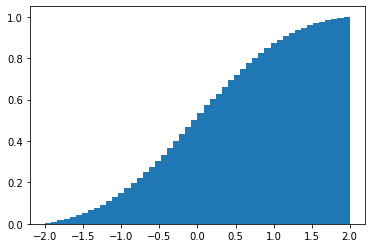

In [47]:
plt.hist(normal, bins = 50, range = (-2, 2), density = True, cumulative = True)

(array([3.332e+03, 2.605e+03, 1.486e+03, 8.370e+02, 5.080e+02, 3.290e+02,
        2.290e+02, 1.640e+02, 1.120e+02, 6.200e+01, 7.000e+01, 6.500e+01,
        3.000e+01, 3.000e+01, 2.900e+01, 2.100e+01, 1.700e+01, 9.000e+00,
        9.000e+00, 6.000e+00, 8.000e+00, 7.000e+00, 3.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.46596799e-02, 6.57853698e-01, 1.30104772e+00, 1.94424174e+00,
        2.58743575e+00, 3.23062977e+00, 3.87382379e+00, 4.51701781e+00,
        5.16021183e+00, 5.80340585e+00, 6.44659987e+00, 7.08979388e+00,
        7.73298790e+00, 8.37618192e+00, 9.01937594e+00, 9.66256996e+00,
        1.03057640e+01, 1.09489580e+01, 1.15921520e+01, 1.22353460e+01,
        1.287854

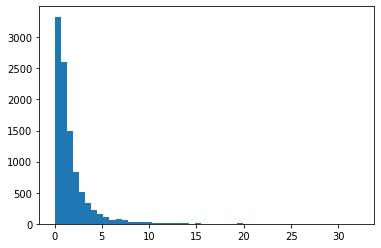

In [40]:
# plot and show histograms
plt.hist(log_norm, bins = 50)

### Zadanie 5

Uzupełnij kod funkcji `normalize()`, która normalizuje przekazany wektor 1D, tzn. zmienia jego długość na 1 (w normie Euklidesowej / L2):

$$x_i -> \frac{x_i}{||x||_2}$$

Jest to bardzo przydatne w praktyce, bo chociaż Numpy ma funkcję obliczającą normę wektora `np.linalg.norm()`, to jest ona typowo wolniejsza od powyższego rozwiązania.

In [ ]:
def normalize(v):
    pass  # implement me!

### Zadanie 6

Uzupełnij kod funkcji `standardize_cols()`, która standaryzuje kolumny macierzy. Jest to odjęcie średniej i podzielenie przez odchylenie standardowe poszczególnych kolumn. Transformuje to liczby do tzw. Z-scores (stąd alternatywna nazwa Z-score normalization):

$$x' = \frac{x - \bar{x}}{\sigma}$$

Jest to częsta operacja w statystyce i uczeniu maszynowym, bo gwarantuje to wycentrowanie danych wokół środka układu współrzędnych i wariancję o tym samym rzędzie wielkości. Wiele algorytmów uczenia maszynowego wymaga takiej transformacji danych dla poprawnego działania, albo daje o wiele bardziej zrozumiałe wyniki po zastosowaniu takiej operacji.

Wykorzystaj tutaj iterację po kolejnych kolumnach. Na następnym wykładzie poznamy działanie **broadcastingu**, który pozwoli nam zapisywać te operacje krócej i przy tym tak, żeby działały szybciej.

In [106]:
import scipy.stats as stats

def standardize_cols(A):
    for j in range(A.shape[1]):
        mn = np.mean(A[:,j])
        sd = np.std(A[:,j])
        #print(mn, sd)
        for i in range(A.shape[0]):
            #print(i, j, "-", A[i,j], mn, sd)
            A[i][j] = (A[i][j] - mn) / sd
        
m = np.random.random_sample(size=16)
m = m.reshape(4,4)
print(m)
print()
print(stats.zscore(m, axis=0))
print()
standardize_cols(m)
print(m)


[[0.77090439 0.13213033 0.01001015 0.58780321]
 [0.27286321 0.38709521 0.7865808  0.96413527]
 [0.94470858 0.46698945 0.85640395 0.28815933]
 [0.68808112 0.82343375 0.29902918 0.26035107]]

[[ 0.4122983  -1.29488412 -1.3670196   0.22064291]
 [-1.60550158 -0.26407338  0.85389351  1.54515544]
 [ 1.11646112  0.05893517  1.05358064 -0.83396315]
 [ 0.07674216  1.50002233 -0.54045454 -0.9318352 ]]

[[ 0.4122983  -1.29488412 -1.3670196   0.22064291]
 [-1.60550158 -0.26407338  0.85389351  1.54515544]
 [ 1.11646112  0.05893517  1.05358064 -0.83396315]
 [ 0.07674216  1.50002233 -0.54045454 -0.9318352 ]]


In [99]:
data = np.array([6.0, 7.0, 7.0, 12.0, 13.0, 13.0, 15.0, 16.0, 19.0, 22.0])

mn = np.mean(data)
sd = np.std(data)
for i in range(data.size):
    data[i] = float(data[i] - mn)/sd
    
print(data)
#stats.zscore(data)

[-1.39443338 -1.19522861 -1.19522861 -0.19920477  0.          0.
  0.39840954  0.5976143   1.19522861  1.79284291]


### Zadanie 7

Stwórz losowy obraz RGB, tzn. macierz rozmiaru (128, 128, 3) z wartościami z zakresu [0, 255] oraz typem `np.uint8`. Wyświetl go za pomocą funkcji `plt.imshow()` ([dokumentacja](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)).

In [191]:
random_img = np.random.randint(low = 0, high = 255, size = (128, 128, 3), dtype = np.uint8)

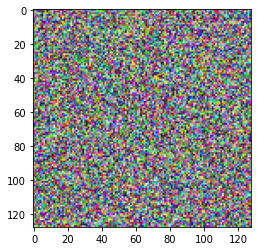

In [192]:
# show image
plt.imshow(random_img)

### Zadanie 8

Narysuj wykres obrazujący różne rzędy złożoności obliczeniowej dla $n = 1, 2, 3, ..., 30$. Zobrazuj funkcje:
- $O(\log_2{(n)})$
- $O(n)$
- $O(n\log_2{(n)}$
- $O(n^2)$
- $O(2^n)$
- $O(n!)$

Zadbaj o to, żeby wykres był czytelny:
- powinna być dostępna legenda z opisem poszczególnych funkcji
- skala wykresu (zakres wartości y) powinna być taka, żeby dobrze było widać poszczególne wykresy
- narysuj wykres liniowy za pomocą `plt.plot()` ([dokumentacja](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) - zadziała on podobnie do wykresu punktowego (scatter plot), ale narysuje linię ciągłą przechodzącą przez punkty
- dodaj tytuł wykresu

Może ci się przydać funkcja `sp.special.factorial()`. Ta wersja funkcji obliczającej silnię (factorial) ze Scipy'a jest lepsza od tej z Numpy'a (`np.math.factorial()`), bo wersja ze Scipy'a działa dla całych macierzy, a ta z Numpy'a tylko dla pojedynczych liczb. Moduł `scipy.special`, jak wiele modułów ze Scipy'a, należy zaimportować osobno (nie importuje się przy `import scipy as sp`) - moduły tej biblioteki są dość duże i importowanie wszystkich naraz dla większości programów marnowałoby pamięć.

In [121]:
import scipy.special

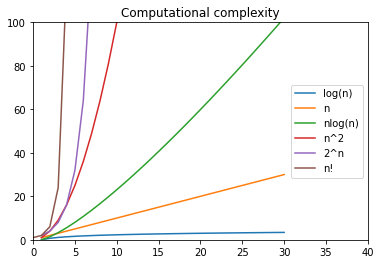

In [155]:
# generate arguments
xs = np.linspace(1, 30, num=30, endpoint=True)
# calculate function values
logn = np.log(xs)
n = xs.copy()
nlogn = xs * np.log(xs)
n2 = xs * xs
exp_2n = np.power(2, xs)
n_factorial = sp.special.factorial(xs)

# plot functions with labels
plt.plot(xs, logn, label="log(n)")
plt.plot(xs, n, label="n")
plt.plot(xs, nlogn, label="nlog(n)")
plt.plot(xs, n2, label="n^2")
plt.plot(xs, exp_2n, label="2^n")
plt.plot(n_factorial, label="n!")
# add legend
plt.legend(loc="right")
# add title
plt.title("Computational complexity")
# limit y values
plt.ylim(0, 100)
plt.xlim(0, 40)
# show plot
plt.show()


### Zadanie 9

Stwórz wektor 1D losowych liczb całkowitych z zakresu [1, 10] długości 100. Następnie uzupełnij kod funkcji `get_most_common_label()`, która zwróci najczęściej występującą wartość z tej tablicy.

Przydadzą ci się tutaj funkcje: `np.bincount()` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html)) zliczająca wystąpienia poszczególnych elementów dla tablic z nieujemnymi liczbami całkowitymi, `np.argmax()` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)) zwraca indeks największego elementu.

Użycie takiej funkcji jest przydatne w ML, bo klasyfikator k najbliższych sąsiadów (k nearest neighbors, kNN) opiera się na wybraniu najczęstszej klasy wśród najbliższych punktów. Klasy (labels) są nieujemnymi liczbami całkowitymi.

In [160]:
labels = np.random.randint(1, 11, size = 100)

array([10,  3,  1,  3, 10,  7,  2,  4,  2,  1,  5,  4, 10,  7,  6,  1,  1,
        6,  4,  8,  4,  7,  8,  5,  4,  5,  4,  8,  9,  2,  5,  5,  1,  6,
       10,  2,  1,  9,  3,  1,  8, 10, 10,  9,  3,  4,  8,  2, 10,  6,  4,
       10,  8,  9,  1,  4, 10,  4,  4,  6, 10,  4, 10,  1,  9, 10,  1,  3,
       10, 10, 10,  2,  3,  2,  1,  6,  3,  4,  4,  5,  4,  2,  8,  5,  2,
        5,  1, 10,  1,  3,  9,  3,  2,  8,  7,  4,  4,  3,  7,  7])

In [167]:
def get_most_common_label(labels):
    x = np.bincount(labels)
    idx = np.argmax(x)
    return idx+1
    
print(get_most_common_label(labels))

5


### Zadanie 10

Stwórz tablicę rozmiaru $8 \times 8$ i wypełnij ją wartościami 0 i 1 według wzoru szachownicy (tj. [[01010101]], [1010...], ...]. Nie wykorzystuj pętli Pythona - użyj tylko Numpy'a i odpowiedniego indeksowania.

Podpowiedź:

In [ ]:
X = np.random.rand(15)
X[::3] = 0
X

array([0.        , 0.37429714, 0.25565156, 0.        , 0.14134073,
       0.14174162, 0.        , 0.62752674, 0.33429482, 0.        ,
       0.32322626, 0.53350518, 0.        , 0.26580113, 0.72496664])

In [196]:
chessboard = np.zeros(shape=(8,8))
chessboard[::2,1::2] = 1
chessboard[1::2,::2] = 1
print(chessboard)
print()
tiles = np.tile((0,1), (8,4))
print(tiles)

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]

[[0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1]]


Dodatkowy challenge na zadanie domowe - spróbuj zrobić to w 1 linijce funkcją `np.tile()` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.tile.html)), służącą do generowania takich prostych, powtarzalnych wzorców.

### Zadanie 11

Uzupełnij kod funkcji `add_sp_noise()`, która dodaje szum typu soft salt&pepper do czarno-białego obrazu (macierz 2D). Szum typu salt&pepper to zamiana losowych pikseli na 255 (salt, biały) lub 0 (pepper, czarny). Typowo dobiera się % pikseli z oryginalnego obrazu, które mają zostać zamienione.

Napisanie tej funkcji sprowadza się do wylosowania punktów, a następnie zamiana ich losowo salt lub pepper. Jako że punkty są losowane, to można po prostu połowę punktów potraktować jako salt, a drugą połowę jako pepper.

Do wczytywania i zapisywania obrazów często używa się biblioteki PIL (Pillow), która pozwala łatwo wczytać obraz jako tablicę Numpy'a. Przykład takiej operacji jest poniżej. Ściągnij obraz Lenna Image, który znajdziesz obok tego notebooka. Wykorzystaj tak załadowany obraz do testu funkcji.

Do ładowania obrazu służy funkcja `Image.open()`, natomiast do wyświetlania tablic Numpy'a jako obrazów funkcja `plt.imshow()`, gdzie argument `cmap="gray"` gwarantuje prawidłowe wyświetlanie obrazów w skali szarości.

In [2]:
from PIL import Image

[[165 161 157 ... 169 165 128]
 [163 160 158 ... 178 171 124]
 [161 159 158 ... 143 119  65]
 ...
 [ 49  49  51 ...  88  91  90]
 [ 45  49  51 ...  99  99  95]
 [ 42  49  52 ... 102 108 110]]


(256, 256)

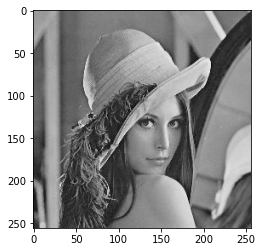

In [4]:
img = np.array(Image.open("lenna_image.jpg"))
print(img)
plt.imshow(img, cmap="gray")
img.shape

In [224]:
def add_sp_noise(gray_img, pixel_perc=0.1):
    x = np.random.randint(low=0, high=256, size=int(pixel_perc*gray_img.size))
    y = np.random.randint(low=0, high=256, size=int(pixel_perc*gray_img.size))
    for i in range(x.size):
        gray_img[x[i],y[i]] = (i % 2) * 255
    return gray_img


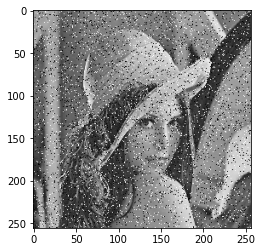

In [229]:
img_sp_noise = add_sp_noise(img, 0.1)
plt.imshow(img_sp_noise, cmap="gray")

### Zadanie 12

Uzupełnij kod funkcji `add_gaussian_noise()`, która dodaje szum normalny do obrazu w skali szarości. Kwestie do rozważenia:
- rozkład normalny przyjmuje prawie wszystkie wartości z zakresu [-0.3, 0.3], dlatego trzeba odpowiednio przeskalować te wartości
- rozkład to liczby zmiennoprzecinkowe, natomiast obraz to liczby całkowite
- finalne wartości muszą być z zakresu [0, 255], może się przydać funkcja `np.clip()` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.clip.html))

In [246]:
def add_gaussian_noise(img):
    arr = np.random.normal(scale=30, size=(256,256))
    arr = np.floor(arr)
    img = np.clip(img+arr, 0, 255)
    return img

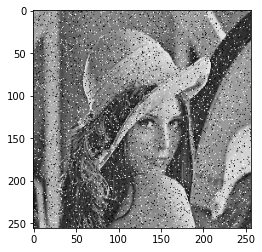

In [247]:
img = np.array(Image.open("lenna_image.jpg"))
img_gaussian_noise = add_sp_noise(img)
plt.imshow(img_gaussian_noise, cmap="gray")

# Zadanie domowe

Jeżeli chcesz jeszcze poćwiczyć Numpy'a, to możesz w ramach zadania domowego przed następnymi ćwiczeniami wykonać niektóre (lub wszystkie) z poniższych ćwiczeń:
- [link 1](https://github.com/Kyubyong/numpy_exercises/blob/master/1_Array_creation_routines.ipynb) - zadania z tworzenia macierzy, rozwiązania są [tutaj](https://github.com/Kyubyong/numpy_exercises/blob/master/1_Array_creation_routines_Solution.ipynb)
- [link 2](https://github.com/rougier/numpy-tutorial#exercises) - zadania "Neophyte"
- [link 3](https://pynative.com/python-numpy-exercise/) - wszystkie zadania
- [link 4](https://faculty.math.illinois.edu/~shahkar2/cbmg/numpy-exercises.html) - exercise 1, 2, 3
- [link 5](https://bic-berkeley.github.io/psych-214-fall-2016/lab_01_exercise.html) - do części "Indexing and slicing, array creation" włącznie
- [link 6](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.md) - do zadania 19 włącznie

Link 2

In [15]:
#1
import numpy as np
#2
np.__version__
#
np.zeros(10)
#5
np.arange(10,100)
#6
np.arange(0,9).reshape(3,3)
#7
np.eye(3)
#8
np.random.random(size=(10,10,10))



[1 2 3 4 5 6 7 8 9]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [1]:
import numpy as np

In [83]:
#101 numpy exercises

#1

#6
arr = np.array([1,2,3,4,5,6,7,8,9])
out = np.where(arr % 2 == 1, 10, arr)
arr.reshape(3, -1) # -1 ustawia automatycznie liczbę kolumn

#8  How to stack two arrays vertically/horizontally?
arr1 = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(2,-1)
arr2 = np.repeat(1, 10).reshape(2,5)

np.hstack([arr1, arr2]) # dołączenie kolumn
np.vstack([arr1, arr2]) # dołączenie wierszy

np.intersect1d(arr1, arr2) #czesc wspólna zbiorów

a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

np.setdiff1d(b,a) # różnica zbiorów

a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
np.nonzero(a == b) # indeksy gdzie są takie same wartości w tablicach

np.where((a > 2) & (a < 5))
a[np.where(np.logical_and(a > 2, a < 5))]

a[(a > 2) & (a < 5)] # indeksy spełniające warunek

a = np.arange(16).reshape(4,-1)
a[[1,2,3,0],:]
a[1::,2::-1]

np.set_printoptions(precision=2)
np.random.uniform(low=5, high=11, size=(10,10))

np.set_printoptions(threshold=sys.maxsize)
np.arange(40)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [92]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = np.genfromtxt(url, delimiter=',', dtype='object')
names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')

species = [row[4] for row in iris]
sepal_length = iris[:4]
sepal_length

array([[b'5.1', b'3.5', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.0', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa']], dtype=object)